# How does each athlete approach the race?
#### * This analysis uses data from the top 20 performances for each athlete. *

## Read and Clean Data

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
sns.set_theme(style='ticks')

# Separating and Reading Data

xlsx = pd.ExcelFile('Track_Project.xlsx')
df_warholm_s = pd.read_excel(xlsx, sheet_name='W_Splits')
df_benjamin_s = pd.read_excel(xlsx, sheet_name='B_Splits')
df_dossantos_s = pd.read_excel(xlsx, sheet_name='DS_Splits')
df_warholm_c = pd.read_excel(xlsx, sheet_name='W_Cumulative')
df_benjamin_c = pd.read_excel(xlsx, sheet_name='B_Cumulative')
df_dossantos_c = pd.read_excel(xlsx, sheet_name='DS_Cumulative')

df_w_splits = df_warholm_s.copy().assign(Athlete='Warholm')
df_b_splits = df_benjamin_s.copy().assign(Athlete='Benjamin')
df_ds_splits = df_dossantos_s.copy().assign(Athlete='dos Santos')
df_splits = pd.concat([df_w_splits,df_b_splits,df_ds_splits],axis=0)
df_splits = df_splits.sort_values(by='Time')

# Setting Up 

athlete_order = ['Warholm','Benjamin','dos Santos']

all_columns = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','Run in']
start_phase_columns = ['H1','H2','H3','H4']
mid_phase_columns = ['H5','H6','H7']
end_phase_columns = ['H8','H9','H10','Run in']
df_splits['Start_Phase'] = df_splits[start_phase_columns].mean(axis=1)
df_splits['Mid_Phase'] = df_splits[mid_phase_columns].mean(axis=1)
df_splits['End_Phase'] = df_splits[end_phase_columns].mean(axis=1)

### Sorting for Top 20 Performances

In [3]:
df_w_splits_top20 = df_w_splits.head(20).assign(Athlete='Warholm')
df_b_splits_top20 = df_b_splits.head(20).assign(Athlete='Benjamin')
df_ds_splits_top20 = df_ds_splits.head(20).assign(Athlete='dos Santos')
df_splits_top20 = pd.concat([df_w_splits_top20,df_b_splits_top20,df_ds_splits_top20],axis=0)
df_splits_top20 = df_splits_top20.sort_values(by='Time')

avg_profiles = df_splits_top20.groupby('Athlete')[all_columns].mean()
avg_profiles = avg_profiles.reset_index().melt(
    id_vars='Athlete',
    var_name='Split',
    value_name='Average Time'
)

## Average Race Splits By Athlete

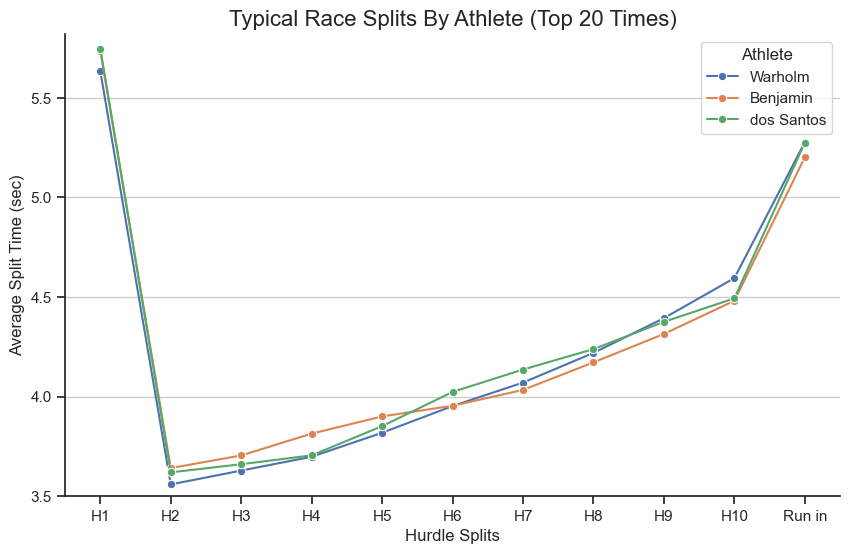

In [4]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_profiles, x='Split', y='Average Time', hue='Athlete',marker='o',hue_order=athlete_order)
sns.despine()
plt.ylim(3.5, 5.82)
plt.ylabel('Average Split Time (sec)')
plt.xlabel('Hurdle Splits')
plt.title('Typical Race Splits By Athlete (Top 20 Times)',fontsize=16)
plt.grid('on',axis='y')
plt.show()

## How do Warholm and Benjamin beat dos Santos?

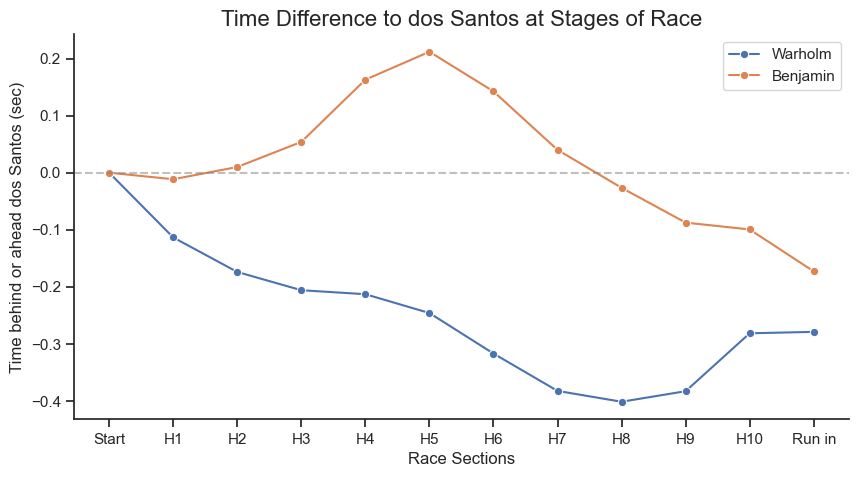

In [5]:
df_w_cumulatives = df_warholm_c.copy().assign(Athlete='Warholm')
df_b_cumulatives = df_benjamin_c.copy().assign(Athlete='Benjamin')
df_ds_cumulatives = df_dossantos_c.copy().assign(Athlete='dos Santos')

df_w_splits_top20_c = df_w_cumulatives.head(20).assign(Athlete='Warholm')
df_b_splits_top20_c = df_b_cumulatives.head(20).assign(Athlete='Benjamin')
df_ds_splits_top20_c = df_ds_cumulatives.head(20).assign(Athlete='dos Santos')
df_splits_top20_c = pd.concat([df_w_splits_top20_c,df_b_splits_top20_c,df_ds_splits_top20_c],axis=0)
df_splits_top20_c = df_splits_top20_c.sort_values(by='Time')

avg_profiles_c = df_splits_top20_c.groupby('Athlete')[all_columns].mean()
avg_profiles_c = avg_profiles_c.reset_index().melt(
    id_vars='Athlete',
    var_name='Split',
    value_name='Average Time'
)

avg_profiles_c_pivot = avg_profiles_c.pivot(index='Split',columns='Athlete',values='Average Time').reset_index()
avg_profiles_c_pivot['Warholm'] = avg_profiles_c_pivot['Warholm']-avg_profiles_c_pivot['dos Santos']
avg_profiles_c_pivot['Benjamin'] = avg_profiles_c_pivot['Benjamin']-avg_profiles_c_pivot['dos Santos']
avg_profiles_ds_gaps = avg_profiles_c_pivot[['Split','Warholm','Benjamin']].melt(
    id_vars='Split',
    var_name='Athlete',
    value_name='Time to dos Santos (sec)'
)
avg_profiles_ds_gaps['Split'] = pd.Categorical(avg_profiles_ds_gaps['Split'], categories=all_columns,ordered=True)

# Add Start of race and reorder
avg_profiles_ds_gaps.loc[-1] = ['Start','Benjamin',0]
avg_profiles_ds_gaps.index = avg_profiles_ds_gaps.index+1
avg_profiles_ds_gaps = avg_profiles_ds_gaps.sort_index()
avg_profiles_ds_gaps.loc[-1] = ['Start','Warholm',0]
avg_profiles_ds_gaps.index = avg_profiles_ds_gaps.index+1
avg_profiles_ds_gaps = avg_profiles_ds_gaps.sort_index()
avg_profiles_ds_gaps = avg_profiles_ds_gaps.reindex([0,1,2,4,5,6,7,8,9,10,11,3,12,13,15,16,17,18,19,20,21,22,14,23])

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=avg_profiles_ds_gaps,x='Split',y='Time to dos Santos (sec)',hue='Athlete',hue_order=athlete_order,marker='o')
sns.despine()
plt.axhline(0,color='gray',alpha=0.5,linestyle='--')
plt.xlabel('Race Sections')
plt.title('Time Difference to dos Santos at Stages of Race',fontsize=16)
plt.ylabel('Time behind or ahead dos Santos (sec)')
h, l = ax.get_legend_handles_labels()
ax.legend(h[0:2],l[0:2])
plt.show()